In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [84]:
df=pd.read_csv('/content/sample_data/Project Data Final - Sheet1 (1).csv')
df['LUXURY & PREMIUM RANKING'] = [8,8,8,7,5,5,4,4,4,3]

In [106]:
Correlate_Feature = df.select_dtypes(include = [np.number])
corr = Correlate_Feature.corr()
corr['Price'].sort_values(ascending = False)[1:]
# df = pd.DataFrame(corr['Price'])


LVMH_Last_Year_GlobalRevenue (Billion_USD)            0.950306
Advertising_Expenditure(Million_EUR)                  0.945090
Chanel_Last_Year_GlobalRevenue(Million_USD)           0.926788
Year                                                  0.921249
Inflation_Rate                                        0.884332
It_Fr_Avg_Annual_Income(EUR)                          0.829700
Global_Disposable_Personal_Income(USD_AvgMonthly)     0.803235
Federal_Funds_Rate                                    0.602913
LVMH_D/E_Ratio                                        0.180996
Global_GDP_Growth_Rate                                0.104615
LUXURY & PREMIUM RANKING                             -0.844689
Bag_Type                                                   NaN
Brand                                                      NaN
Name: Price, dtype: float64

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Bag_Type                                            10 non-null     object 
 1   Brand                                               10 non-null     object 
 2   Year                                                10 non-null     int64  
 3   Price                                               10 non-null     int64  
 4   LVMH_Last_Year_GlobalRevenue (Billion_USD)          10 non-null     float64
 5   Advertising_Expenditure(Million_EUR)                10 non-null     int64  
 6   Inflation_Rate                                      10 non-null     float64
 7   Chanel_Last_Year_GlobalRevenue(Million_USD)         10 non-null     int64  
 8   LVMH_D/E_Ratio                                      10 non-null     float64
 9   Fe

In [86]:
df['Bag_Type'] = df['Bag_Type'].astype('category')
df['Bag_Type'] = df['Bag_Type'].cat.codes

df['Brand'] = df['Brand'].astype('category')
df['Brand'] = df['Brand'].cat.codes

df.isnull().sum()

Bag_Type                                              0
Brand                                                 0
Year                                                  0
Price                                                 0
LVMH_Last_Year_GlobalRevenue (Billion_USD)            0
Advertising_Expenditure(Million_EUR)                  0
Inflation_Rate                                        0
Chanel_Last_Year_GlobalRevenue(Million_USD)           0
LVMH_D/E_Ratio                                        0
Federal_Funds_Rate                                    0
It_Fr_Avg_Annual_Income(EUR)                          0
Global_Disposable_Personal_Income(USD_AvgMonthly)     0
Global_GDP_Growth_Rate                                0
LUXURY & PREMIUM RANKING                              0
dtype: int64

In [87]:
x = df.drop (columns = 'Price')
x

,Bag_Type,Brand,Year,LVMH_Last_Year_GlobalRevenue (Billion_USD),Advertising_Expenditure(Million_EUR),Inflation_Rate,Chanel_Last_Year_GlobalRevenue(Million_USD),LVMH_D/E_Ratio,Federal_Funds_Rate,It_Fr_Avg_Annual_Income(EUR),Global_Disposable_Personal_Income(USD_AvgMonthly),Global_GDP_Growth_Rate,LUXURY & PREMIUM RANKING
0,0,0,2014,40.25,3484,3.2,7380,0.37055,0.01125,32325.5,13445.90,3.0735,8
1,0,0,2015,37.26,4017,2.7,7523,0.35295,0.01125,32697.0,13935.80,3.0829,8
2,0,0,2016,38.99,4242,2.7,7890,0.31045,0.01125,33085.0,14176.70,2.8086,8
3,0,0,2017,39.58,4831,3.2,8630,0.43665,0.01750,33054.5,14613.97,3.3899,7
4,0,0,2018,51.18,5518,3.6,9623,0.36510,0.02625,34007.0,15143.62,3.2880,5
5,0,0,2019,53.56,6265,3.5,11119,0.37385,0.02750,34517.0,15608.91,2.5946,5
6,0,0,2020,60.12,4869,3.2,12273,0.65820,0.00477,33213.0,16607.47,-3.0722,4
7,0,0,2021,54.91,7291,4.7,10108,0.50675,0.00477,35081.5,17138.72,6.0238,4
8,0,0,2022,72.72,9502,8.7,15639,0.39130,0.02500,35081.5,16117.05,3.0803,4
9,0,0,2023,84.80,9502,6.9,17224,0.37570,0.05208,35081.5,16744.50,3.0803,3


In [88]:
y=df['Price']

In [97]:
x_train, x_test, y_train, y_test = train_test_split(
x, y, test_size=0.33, random_state=0)
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [98]:
c = lr.intercept_
c

27806.203927974402

In [99]:
m = lr.coef_
m

array([-3.23618909e-12, -6.61026789e-13, -2.63181379e+00,  9.91348772e+01,
        7.54933102e-01,  1.79550264e+01, -5.22121733e-01,  8.36279701e-01,
       -4.61479704e-02, -8.97321713e-01,  6.39927661e-01,  1.87072521e+01,
       -1.07663488e+01])

In [100]:
y_pred_train = lr.predict(x_train)

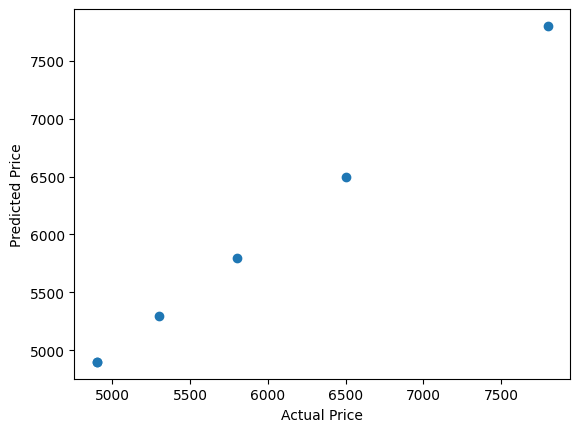

In [101]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [102]:
r2_score(y_train, y_pred_train)

1.0

In [103]:
y_pred_test = lr.predict(x_test)

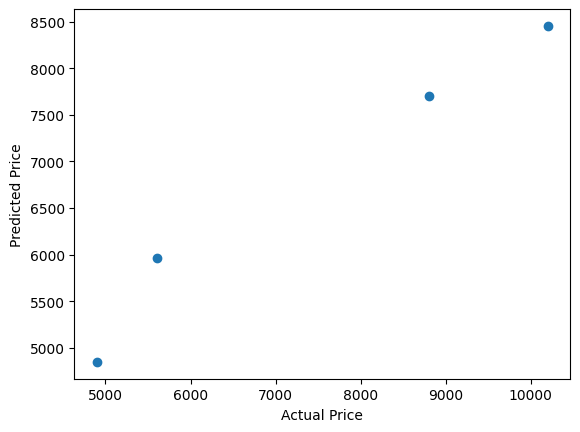

In [104]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [ ]:
r2_score(y_test, y_pred_test)

0.8228975284831064